# Теория
ось абсцисс - ось х
ось ординат - ось у
## Виды графиков
* Линейный график (lineplot)
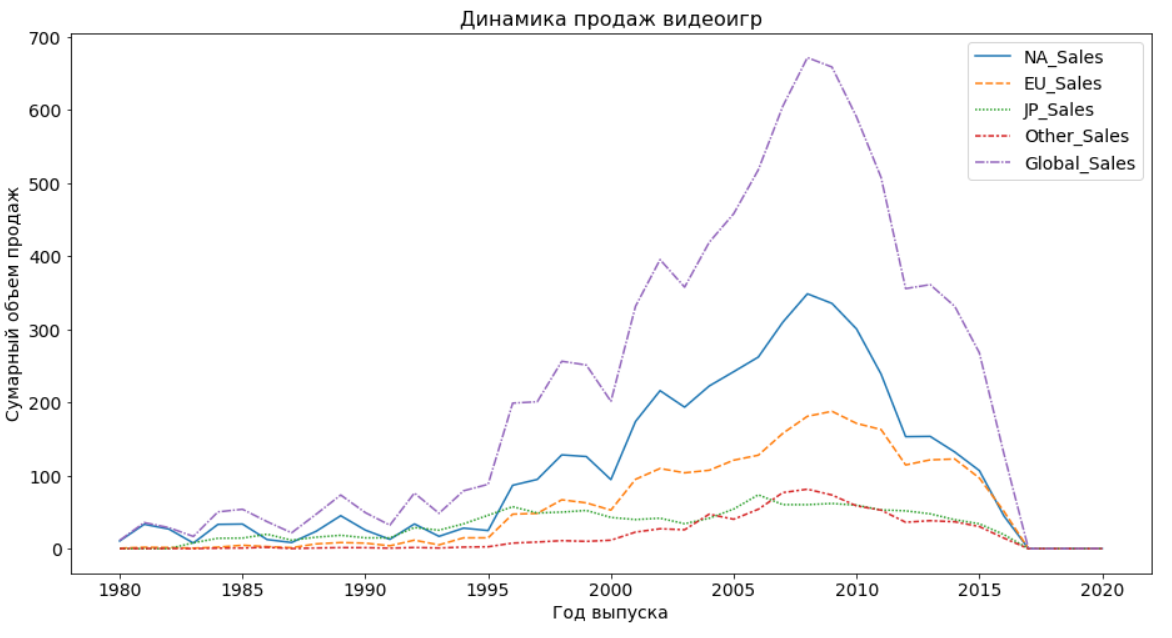

In [4]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

ModuleNotFoundError: No module named 'matplotlib'

* гистограмма (histogram)
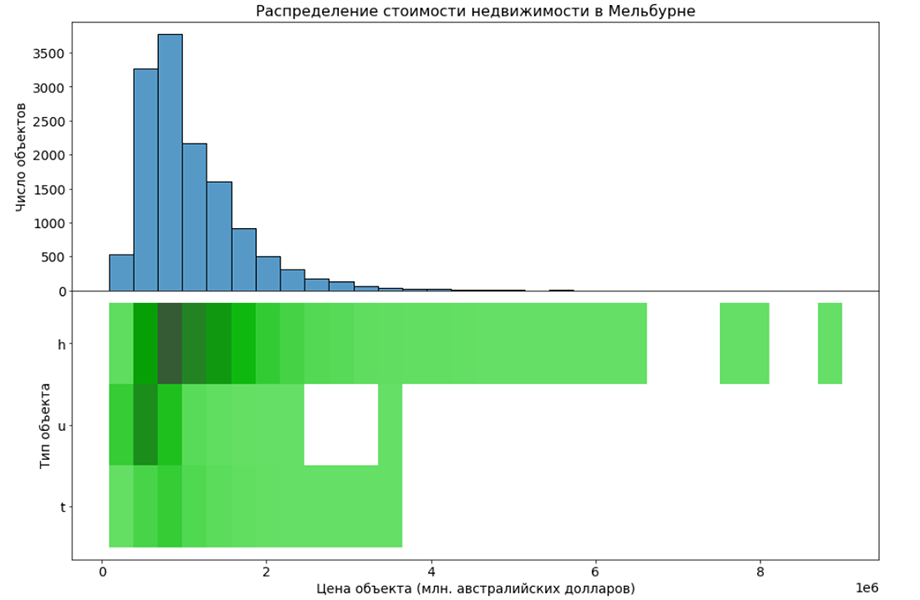

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')

* Диаграмма рассеяния (scatterplot)
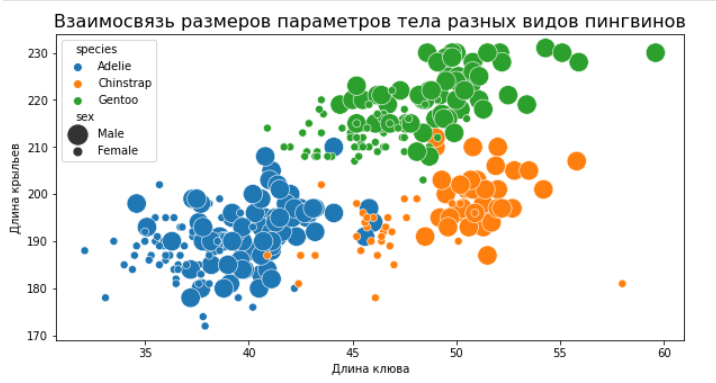

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина крыльев')

* Круговая диаграмма (pie chart)
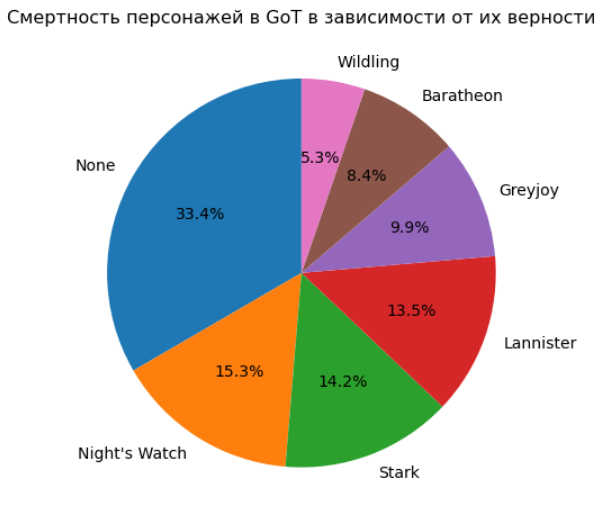

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

game_of_thrones_df = pd.read_csv('data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

* столбчатая диаграмма (bar chart)
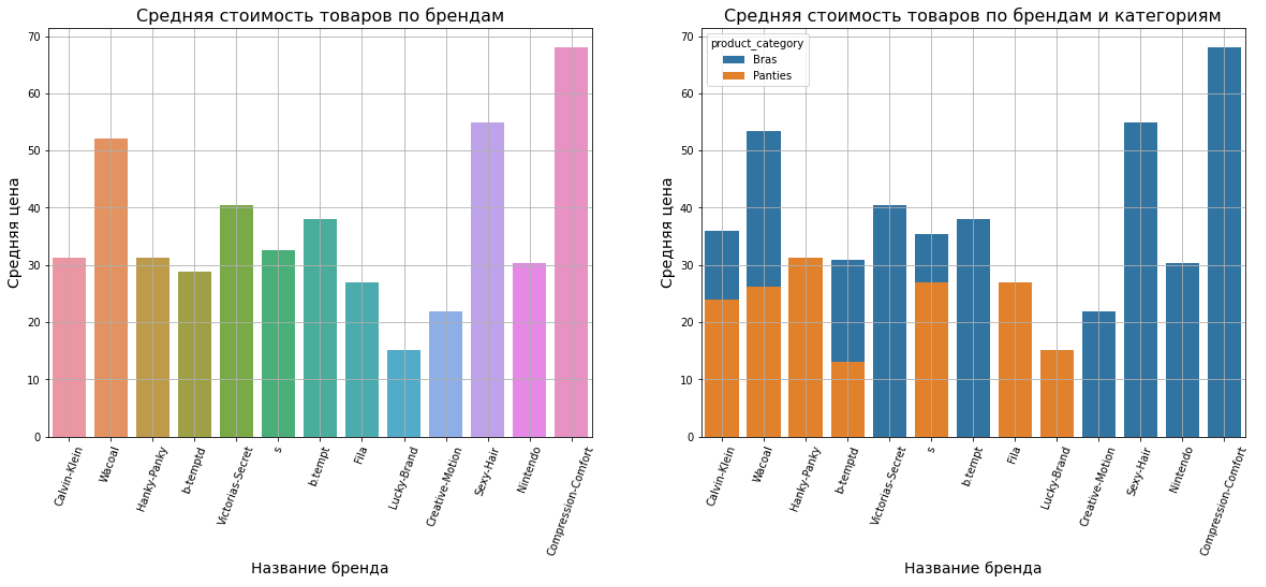

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

* Тепловая карта (heatmap)
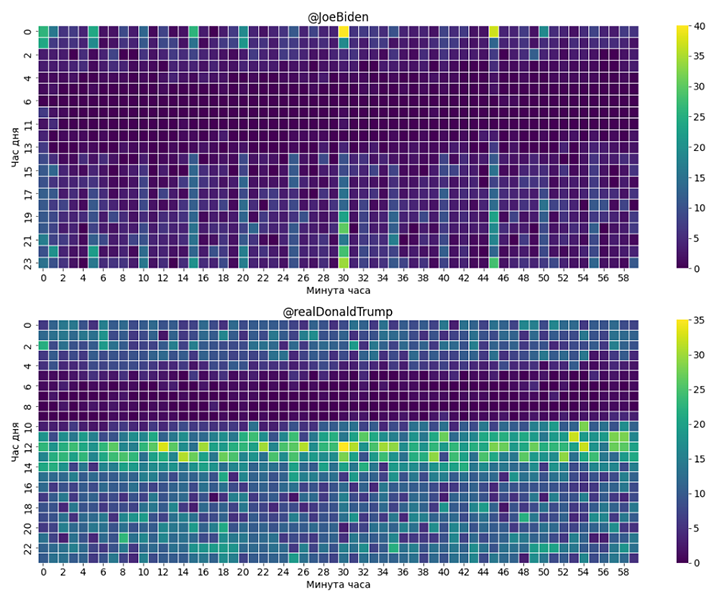

In [ ]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

NameError: name 'pd' is not defined

* Коробчатая диаграмма (boxplot, box and whisker plot)
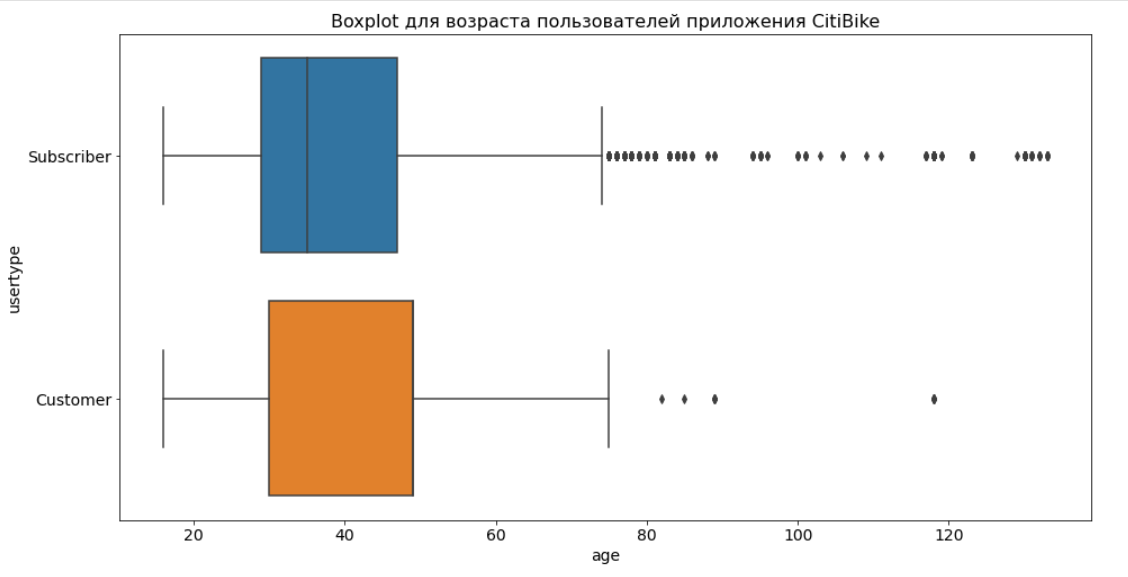

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя')

# Covid data

In [4]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


* date — дата наблюдения;
* province/state — наименование провинции/штата;
* country — наименование страны;
* confirmed — общее число зафиксированных случаев на указанный день;
* deaths — общее число зафиксированных смертей на указанный день;
* recovered — общее число выздоровлений на указанный день.

In [5]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


Данная таблица содержит следующие столбцы:

* country — наименование страны;
* date — дата наблюдения;
* total_vaccinations — общее число введённых вакцин в стране на указанный день;
* people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
* people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как people_vaccinated / population * 100);
* people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как people_fully_vaccinated / population * 100);
* daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
* vaccines — комбинации вакцин, используемые в стране.

Также обратим внимание на некоторые другие моменты:
в таблице covid_data данные предоставлены для каждого штана (региона страны) за каждый день в подробном виде:
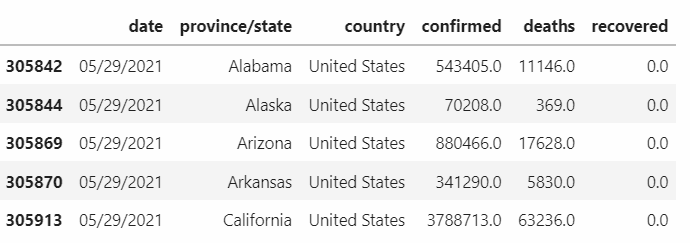

При этом в таблице vaccinations_data значения указаны для всех стран на каждый день, но без разбивки по регионам
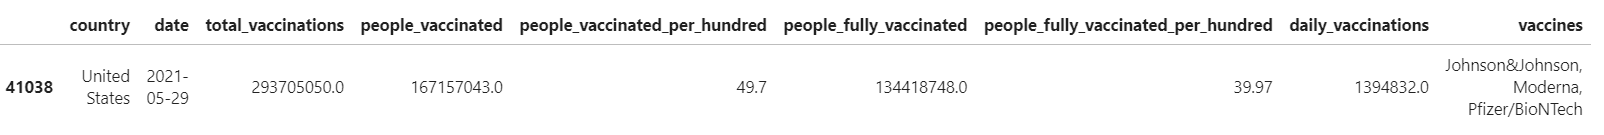

В данных много пропусков, а также неверно введённых значений. Например, для США (United States) и Великобритании (United Kingdom) в большинстве записей таблицы covid_data число выздоровевших людей равно 0. В данном модуле мы закроем на это глаза, но вообще эти страны подлежали бы исключению из данных или нам понадобился бы дополнительный источник данных, из которого мы смогли бы получить недостающую информацию.

Обратите внимание, что признаки confirmed, deaths, recovered, total_vaccination, people_vaccinated, people_fully_vaccinated — это суммарные показатели по стране, то есть с каждым днём они должны расти. Такие признаки называют накопительными.

Разумеется, есть желание объединить таблицы, но сть следующие нюансы:
1) В таблице covid_data необходимо предварительно рассчитать суммарное ежедневное число заболевших во всех провинциях/штатах в каждой стране.

2) В таблицах не совпадает число стран, а иногда и их названия. 

При объединении таблиц по столбцу мы определённо теряем данные (в данной задаче потери незначительны). Избежать этого можно ручными преобразованиями данных — искать различия в названиях стран в таблицах и преобразовывать их. Однако это не является темой данного модуля.

3) Таблицы имеют разные периоды наблюдений (вакцины появились позже, чем сам вирус). Объединив данные с типом inner, мы можем потерять большое количество наблюдений в таблице covid_data.

Опираясь на эти моменты, вы полним следующую предобработку:
### в covid_data:
1) Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [6]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [7]:
#Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [8]:
#Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [9]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Преобразования в vaccination_data:

In [10]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
vaccinations_data

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [11]:
vaccinations_data = vaccinations_data.sort_values(by= 'date', ascending= True)
vaccinations_data

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
28893,Norway,2020-12-02,0.0,0.0,0.00,NaN,NaN,NaN,"Moderna, Pfizer/BioNTech"
28894,Norway,2020-12-03,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21214,Latvia,2020-12-04,1.0,1.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
28895,Norway,2020-12-04,0.0,0.0,0.00,NaN,NaN,0.0,"Moderna, Pfizer/BioNTech"
21215,Latvia,2020-12-05,NaN,NaN,NaN,NaN,NaN,0.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
...,...,...,...,...,...,...,...,...,...
29639,Pakistan,2021-09-06,63319214.0,48106755.0,21.36,20058377.0,8.91,1182525.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
6809,Canada,2021-09-06,53829771.0,28120156.0,73.87,25709615.0,67.54,81797.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
30024,Panama,2021-09-06,4711715.0,2819641.0,64.35,1892074.0,43.18,50933.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
36494,South Sudan,2021-09-06,59865.0,53147.0,0.47,6718.0,0.06,388.0,Oxford/AstraZeneca


In [12]:
covid_df = covid_data.merge(
    vaccinations_data,
    how = 'left',
    on = ['date', 'country']
)
covid_df

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
covid_df['death rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
covid_df

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Russia_recoveries = covid_df[covid_df['country'] == 'Russia']
Russia_recoveries['recover_rate'].mean()

NameError: name 'covid_df' is not defined

## 4. Графические возможности библиотеки Pandas
Дальнейшая работа будет проводиться с таблицей covid_df — результатом объединения таблиц covid_data и vaccinations_data.

Оказывается, за способами визуализации данных не нужно далеко ходить. Базовую (примитивную) визуализацию можно выполнить с помощью уже знакомой нам библиотеки Pandas. Функционал для создания основных типов графиков уже включён в библиотеку. С изучения возможностей Pandas мы и начнём наше погружение в программную визуализацию.
В терминале ввёл команду pip install matplotlib
### Базовая визуализация в Pandas
основным методом для создания простых графиков является метод plot(). Параметры метода: 
* x — название признака, который будет отложен по оси абсцисс;
* y — название признака, который будет отложен по оси ординат;
* figsize — размер графика (кортеж из ширины и высоты в дюймах);
* kind —тип визуализации. Основные типы:
'line' — линейный график (по умолчанию);
'bar' — столбчатая диаграмма;
'barh' — горизонтальная столбчатая диаграмма;
'hist' — гистограмма;
'box' — коробчатая диаграмма (boxplot);
'pie' — круговая диаграмма;
'scatter' — диаграмма рассеяния.
* grid — отображение сетки (по умолчанию False);
* legend — отображение легенды (по умолчанию False);
* title — название графика;
* color — цвет.

In [2]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
)

NameError: name 'covid_df' is not defined

In [1]:
import sys
print(sys.executable)

c:\Users\vladi\OneDrive\Рабочий стол\Обучение\IDE\python.exe


../../Users/vladi/OneDrive/Рабочий стол/Обучение/IDE - 